In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('E:/sem5/apl302product/computational_project/ShipGen_Dataset - Copy - Copy(in).csv')

In [3]:
df.head()

,Cluster_num,Index,LOA,Lb,Ls,Bd,Dd,Bs,WL,Bc,...,Bbb,Lbbm,Rbb,Kappa_SB,Lsb,HSBOA,Hsb,Bsb,Lsbm,Rsb
0,C1,Ship1,10,0.487046,0.351399,0.324019,0.066849,0.894289,0.341421,0.265725,...,0.135721,0.478892,0.193742,0.058955,0.103617,0.578203,0.127320,0.622241,-0.797926,0.240102
1,C1,Ship2,10,0.083485,0.628481,0.324780,0.233361,0.249086,0.573687,0.122851,...,0.218271,-0.867885,0.295956,0.857342,0.083604,0.402865,0.033021,0.268795,0.395996,0.292879
2,C1,Ship3,10,0.274263,0.424025,0.310114,0.145336,0.390768,0.738324,0.325483,...,0.907911,-0.189184,0.114384,0.309699,0.056079,0.064621,0.402122,0.187168,0.725449,0.327745
3,C1,Ship4,10,0.060542,0.579765,0.213636,0.139643,0.300325,0.538537,0.328678,...,0.675104,0.442512,0.130745,0.519058,0.186296,0.392385,0.917749,0.859255,-0.757502,0.251806
4,C1,Ship5,10,0.226815,0.341567,0.295172,0.087102,0.936287,0.263158,0.398645,...,0.479292,0.372732,0.166270,0.460905,0.004669,0.572621,0.842679,0.632994,0.380622,0.088562


In [4]:
X = df.select_dtypes(include=[np.number])

In [5]:
# Mean
X_mean = X.mean()

# Standard deviation
X_std = X.std()

# Standardization
Z = (X - X_mean) / X_std

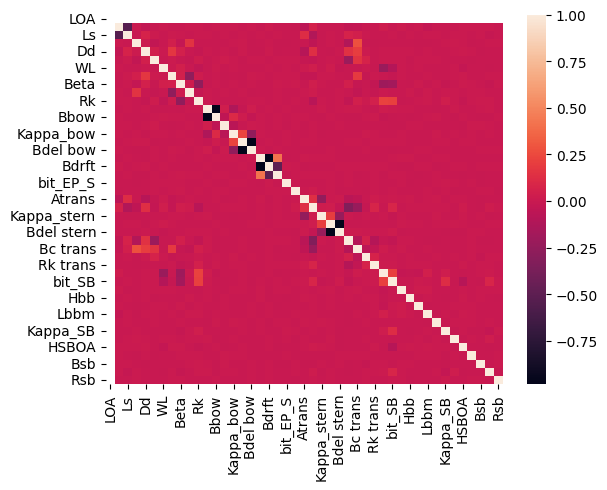

In [6]:
# covariance
c = Z.cov()

# Plot the covariance matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()

In [7]:
# Check if covariance matrix has NaN or inf values
print(np.isnan(c).sum())  # Count of NaNs
print(np.isinf(c).sum())  # Count of infs

LOA            45
Lb              1
Ls              1
Bd              1
Dd              1
Bs              1
WL              1
Bc              1
Beta            1
Rc              1
Rk              1
Abow            1
Bbow            1
BK_z            1
Kappa_bow       1
Adel bow        1
Bdel bow        1
Adrft           1
Bdrft           1
Cdrft           1
bit_EP_S        1
bit_EP_T        1
Atrans          1
SK_z            1
Kappa_stern     1
Adel stern      1
Bdel stern      1
Beta trans      1
Bc trans        1
Rc Trans        1
Rk trans        1
bit_BB          1
bit_SB          1
Lbb             1
Hbb             1
Bbb             1
Lbbm            1
Rbb             1
Kappa_SB        1
Lsb             1
HSBOA           1
Hsb             1
Bsb             1
Lsbm            1
Rsb             1
dtype: int64
LOA            0
Lb             0
Ls             0
Bd             0
Dd             0
Bs             0
WL             0
Bc             0
Beta           0
Rc             0
Rk     

In [8]:
# Replace NaN with 0
c = np.nan_to_num(c, nan=0.0, posinf=0.0, neginf=0.0)


In [9]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [2.30355124 2.15418749 2.08084245 1.95144163 0.01523479 0.01746031
 0.01665471 0.01701687 1.75422057 1.66872432 1.51952997 0.39226463
 1.43669332 0.46192541 1.29995493 0.58917308 0.65087556 0.6778442
 0.68331894 0.69063673 0.72227695 0.74562238 0.85068421 1.14346898
 1.1408874  0.88298363 1.07892263 1.06110811 1.05254226 0.95526448
 0.96122501 0.9625821  1.03912281 1.03277208 1.02761249 1.01981213
 1.01269528 1.00428889 1.0001846  0.97627936 0.97984576 0.98400392
 0.99279178 0.99147164 0.        ]
Eigen values Shape: (45,)
Eigen Vector Shape: (45, 45)


In [10]:
eigenvectors

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.98893776e-02,  4.67099857e-03, -1.90123628e-02, ...,
         4.83729834e-02,  5.41488603e-03,  0.00000000e+00],
       [-1.51467418e-02, -4.84027355e-03,  2.30064181e-02, ...,
        -1.77751449e-02, -6.76792652e-03,  0.00000000e+00],
       ...,
       [ 9.36684191e-03,  1.23039946e-02, -5.55330367e-05, ...,
         6.60847597e-01, -1.39396390e-01,  0.00000000e+00],
       [ 6.71458272e-03,  1.01807992e-02,  1.27457194e-03, ...,
        -2.61667603e-03, -6.56274367e-02,  0.00000000e+00],
       [ 5.83410235e-03, -1.74380195e-03, -4.36115456e-03, ...,
         2.25118567e-01, -2.92909795e-02,  0.00000000e+00]])

In [11]:
# Index the eigenvalues in descending order 
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order 
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]

In [12]:
eigenvalues

array([2.30355124, 2.15418749, 2.08084245, 1.95144163, 1.75422057,
       1.66872432, 1.51952997, 1.43669332, 1.29995493, 1.14346898,
       1.1408874 , 1.07892263, 1.06110811, 1.05254226, 1.03912281,
       1.03277208, 1.02761249, 1.01981213, 1.01269528, 1.00428889,
       1.0001846 , 0.99279178, 0.99147164, 0.98400392, 0.97984576,
       0.97627936, 0.9625821 , 0.96122501, 0.95526448, 0.88298363,
       0.85068421, 0.74562238, 0.72227695, 0.69063673, 0.68331894,
       0.6778442 , 0.65087556, 0.58917308, 0.46192541, 0.39226463,
       0.01746031, 0.01701687, 0.01665471, 0.01523479, 0.        ])

In [13]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.05235344, 0.10131224, 0.14860412, 0.19295506, 0.23282371,
       0.27074927, 0.30528404, 0.33793616, 0.36748059, 0.39346852,
       0.41939778, 0.44391875, 0.46803484, 0.49195626, 0.51557268,
       0.53904478, 0.56239961, 0.58557715, 0.60859296, 0.6314177 ,
       0.65414917, 0.67671262, 0.69924607, 0.72160979, 0.74387902,
       0.76606718, 0.78794405, 0.80979007, 0.83150063, 0.85156844,
       0.87090217, 0.88784813, 0.90426352, 0.91995981, 0.93548978,
       0.95089533, 0.96568796, 0.97907826, 0.98957656, 0.99849167,
       0.99888849, 0.99927524, 0.99965375, 1.        , 1.        ])

In [14]:
n_components = np.argmax(explained_var >= 0.90) + 1
n_components

33

In [22]:
print(df.columns)

Index(['Cluster_num', 'Index', 'LOA', 'Lb', 'Ls', 'Bd', 'Dd', 'Bs', 'WL', 'Bc',
       'Beta', 'Rc', 'Rk', 'Abow', 'Bbow', 'BK_z', 'Kappa_bow', 'Adel bow',
       'Bdel bow', 'Adrft', 'Bdrft', 'Cdrft', 'bit_EP_S', 'bit_EP_T', 'Atrans',
       'SK_z', 'Kappa_stern', 'Adel stern', 'Bdel stern', 'Beta trans',
       'Bc trans', 'Rc Trans', 'Rk trans', 'bit_BB', 'bit_SB', 'Lbb', 'Hbb',
       'Bbb', 'Lbbm', 'Rbb', 'Kappa_SB', 'Lsb', 'HSBOA', 'Hsb', 'Bsb', 'Lsbm',
       'Rsb'],
      dtype='object')


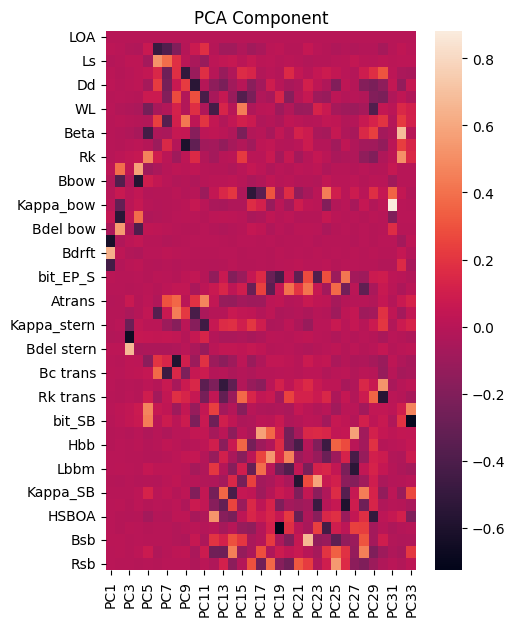

In [23]:
feature_names = df.columns[2:]  # Exclude 'Cluster_num' and 'Index'

# Update PCA component DataFrame
pca_component = pd.DataFrame(
    u,
    index=feature_names,
    columns=[f'PC{i+1}' for i in range(n_components)]
)

# Plotting heatmap
plt.figure(figsize=(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

In [38]:
# Check shapes
print("Shape of Z:", Z.shape)  # Expected: (30000, 33)
print("Shape of pca_component:", pca_component.shape)  # Expected: (33, 33)

Shape of Z: (30000, 45)
Shape of pca_component: (45, 33)


In [47]:
df


,Cluster_num,Index,LOA,Lb,Ls,Bd,Dd,Bs,WL,Bc,...,Bbb,Lbbm,Rbb,Kappa_SB,Lsb,HSBOA,Hsb,Bsb,Lsbm,Rsb
0,C1,Ship1,10,0.487046,0.351399,0.324019,0.066849,0.894289,0.341421,0.265725,...,0.135721,0.478892,0.193742,0.058955,0.103617,0.578203,0.127320,0.622241,-0.797926,0.240102
1,C1,Ship2,10,0.083485,0.628481,0.324780,0.233361,0.249086,0.573687,0.122851,...,0.218271,-0.867885,0.295956,0.857342,0.083604,0.402865,0.033021,0.268795,0.395996,0.292879
2,C1,Ship3,10,0.274263,0.424025,0.310114,0.145336,0.390768,0.738324,0.325483,...,0.907911,-0.189184,0.114384,0.309699,0.056079,0.064621,0.402122,0.187168,0.725449,0.327745
3,C1,Ship4,10,0.060542,0.579765,0.213636,0.139643,0.300325,0.538537,0.328678,...,0.675104,0.442512,0.130745,0.519058,0.186296,0.392385,0.917749,0.859255,-0.757502,0.251806
4,C1,Ship5,10,0.226815,0.341567,0.295172,0.087102,0.936287,0.263158,0.398645,...,0.479292,0.372732,0.166270,0.460905,0.004669,0.572621,0.842679,0.632994,0.380622,0.088562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C6,Ship29996,10,0.354432,0.583364,0.320604,0.158578,0.552232,0.130721,0.383572,...,0.770716,0.376704,0.061780,0.464787,0.058444,0.004463,0.758628,0.001705,-0.998850,0.311458
29996,C6,Ship29997,10,0.563769,0.433466,0.241609,0.072459,0.947761,0.555238,0.090315,...,0.986134,-0.959912,0.305468,0.846100,0.127845,0.847450,0.789695,0.149637,0.173933,0.293166
29997,C6,Ship29998,10,0.378181,0.061726,0.102167,0.088340,0.260140,0.642254,0.120245,...,0.176141,-0.459899,0.179140,0.737152,0.014831,0.128612,0.661668,0.117853,-0.801940,0.150723
29998,C6,Ship29999,10,0.357847,0.527965,0.318352,0.104925,0.851821,0.550436,0.231773,...,0.314726,0.433173,0.219243,0.656153,0.057218,0.818912,0.751852,0.714668,0.528987,0.132446


In [43]:
pca_component

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33
LOA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Lb,0.019889,0.004671,-0.019012,-0.026140,0.069715,-0.485275,-0.386236,-0.201139,-0.009482,0.074791,...,-0.006473,-0.033839,-0.016991,-0.023813,-0.015735,-0.013492,-0.064015,-0.004022,0.027985,0.003106
Ls,-0.015147,-0.004840,0.023006,0.025716,-0.071304,0.519914,0.386378,0.180424,0.007974,-0.052284,...,-0.008165,0.004207,0.010218,0.039331,0.008916,0.001720,0.026065,0.013755,0.018252,0.014111
Bd,0.011823,-0.007852,0.004370,0.020801,0.044054,0.140631,-0.270957,0.171656,-0.511846,-0.111546,...,0.078209,0.044144,0.006189,-0.012463,0.089058,0.171946,0.308111,0.015327,-0.043323,-0.058667
Dd,0.015795,-0.004861,0.009758,0.022130,-0.066632,0.226580,-0.243139,0.062021,0.222074,-0.544706,...,-0.034805,-0.202692,0.021666,-0.005978,-0.189787,-0.228167,-0.150337,0.042009,-0.136368,0.053858
Bs,-0.004312,0.004897,-0.001150,-0.010073,0.074965,0.070587,-0.195353,0.274529,-0.023517,0.289468,...,-0.116099,0.014741,-0.012138,-0.000263,-0.021628,-0.193270,-0.220206,-0.029315,0.032446,-0.027854
WL,0.004554,-0.019016,-0.036019,-0.047461,-0.245083,-0.056757,-0.023322,0.117127,-0.022511,0.176961,...,0.064332,-0.062537,-0.089063,-0.099912,-0.066749,-0.381830,0.041983,0.008017,0.145761,0.106532
Bc,-0.003604,0.008622,-0.002138,-0.008251,-0.021521,0.239328,-0.366274,0.105556,0.423446,0.026337,...,0.033656,0.030342,-0.021137,-0.012960,0.062425,0.125881,0.192289,-0.013075,0.216865,0.108123
Beta,-0.004856,-0.012583,-0.028869,-0.059424,-0.441488,-0.039701,-0.052819,0.057437,0.050075,-0.177605,...,-0.063474,0.051750,-0.030119,-0.060318,0.146815,0.234978,-0.071593,-0.032181,0.681182,0.000886
Rc,-0.000448,-0.006692,0.002136,0.015436,-0.009681,-0.102174,0.145837,-0.012446,-0.604725,-0.318754,...,-0.014478,-0.082883,0.027026,-0.028485,-0.074566,-0.082564,-0.131817,0.009020,0.227627,0.128042


In [46]:
eigenvectors[2]


array([-0.01514674, -0.00484027,  0.02300642,  0.0257163 , -0.07130387,
        0.51991418,  0.38637838,  0.18042394,  0.0079735 , -0.05228373,
       -0.11580802,  0.01462833,  0.03897439,  0.05756492,  0.01084715,
        0.05601778,  0.01276844,  0.0147079 , -0.00070313,  0.01385121,
       -0.00090071, -0.01777514, -0.00676793, -0.00816454,  0.00420721,
        0.01021815,  0.03933121,  0.00891561,  0.00171984,  0.02606485,
        0.0137553 ,  0.01825206,  0.01411114,  0.01933776, -0.02178625,
        0.01030218, -0.01612399, -0.01056189, -0.66610665,  0.2600345 ,
       -0.00072774,  0.0033289 ,  0.0011547 , -0.00097488,  0.        ])

In [51]:
# Convert 'df' to numpy array if it’s not already in that format
data_matrix = X.values  # Shape should be (30000, original_features)

# Convert eigenvectors to a numpy array if it’s a DataFrame and reduce to 33 dimensions
eigenvectors_33 = eigenvectors[:, :33]  # Shape should be (original_features, 33)

# Perform the dimensionality reduction
reduced_data = data_matrix @ eigenvectors_33  # Resulting shape should be (30000, 33)

# Convert the reduced data back to a DataFrame
reduced_df = pd.DataFrame(reduced_data, columns=[f'PCA{i+1}' for i in range(33)])

# Display the new reduced DataFrame
print(reduced_df)

            PCA1      PCA2      PCA3      PCA4       PCA5      PCA6      PCA7  \
0     -11.778852 -5.963981  2.708248  0.291570  -8.006616 -0.704716 -1.576061   
1      -8.364062 -5.211114  2.624651  2.394817  -5.990686  3.183806  2.804452   
2     -14.688830  0.935685  2.557508  2.727295  -4.719920  0.800718  0.966228   
3      -1.910175 -3.550928  1.806465  1.173408  -4.542943  3.716949  1.656472   
4      -4.126756 -0.388126  3.222836 -5.845613  -2.105691  0.929160  0.729523   
...          ...       ...       ...       ...        ...       ...       ...   
29995 -17.085221 -3.341398  1.682036  1.703713 -17.495993  1.286653  1.483790   
29996 -23.252906 -6.707183  3.558870 -1.823513 -15.633831  0.136404 -1.486565   
29997 -12.042836 -3.758084 -0.835530  2.205042 -19.345382 -1.458892 -1.657280   
29998 -14.194554 -0.786500 -3.435249  4.450310 -19.161349  2.152633  0.914137   
29999 -30.491737 -0.578372  1.422725 -3.267359 -17.048938 -0.326260 -1.104335   

            PCA8      PCA9 

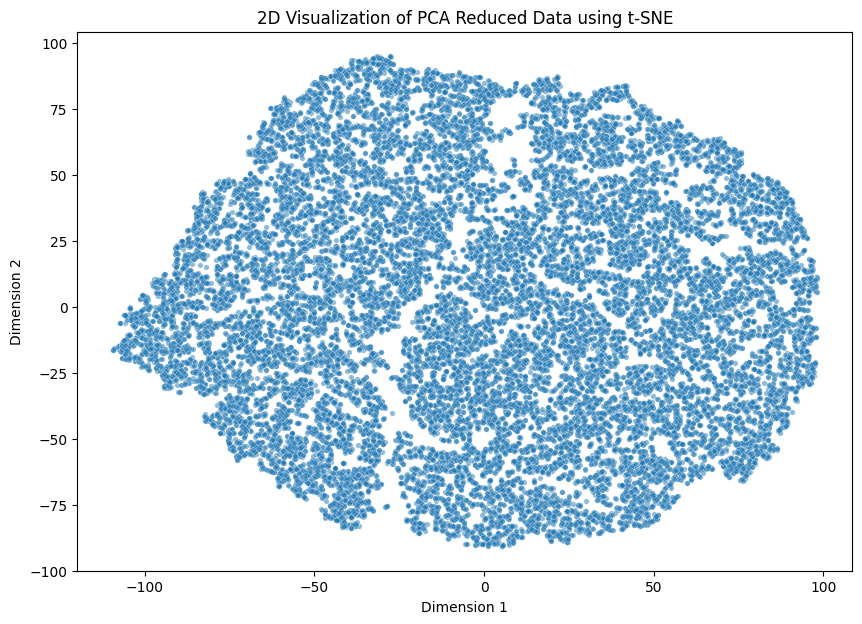

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

# Assuming 'reduced_df' is your DataFrame with 33 PCA components
# Apply t-SNE to reduce to 2 dimensions for visualization
tsne = TSNE(n_components=2, random_state=42)
data_2d = tsne.fit_transform(reduced_df)

# Create a DataFrame with the 2D representation
data_2d_df = pd.DataFrame(data_2d, columns=['Dim1', 'Dim2'])

# Plot the 2D data
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Dim1', y='Dim2', data=data_2d_df, alpha=0.5, s=15)
plt.title('2D Visualization of PCA Reduced Data using t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


In [57]:
# Export reduced_df to a CSV file
reduced_df.to_csv('reduced_data.csv', index=False)  # Set index=True if you want to include row indices


In [58]:
# Assuming you have a 'label' column in `reduced_df` for color coding
# Merge the 2D t-SNE results with labels if not already present
data_2d_df['label'] = reduced_df['label']  # Replace 'label' with the name of your label column

# Plot with different colors for each label
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Dim1', y='Dim2', hue='label', data=data_2d_df, palette='viridis', s=15, alpha=0.7)
plt.title('2D Visualization of PCA Reduced Data using t-SNE (Colored by Label)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


KeyError: 'label'

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt

# # Merge the 3D t-SNE results with labels if not already present
# data_3d_df['label'] = reduced_df['label']  # Replace 'label' with the name of your label column

# # Create a 3D scatter plot with color coding
# fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(data_3d_df['Dim1'], data_3d_df['Dim2'], data_3d_df['Dim3'], 
#                      c=data_3d_df['label'], cmap='viridis', s=15, alpha=0.7)

# # Add color bar for labels
# plt.colorbar(scatter, ax=ax, label='Label')
# ax.set_title('3D Visualization of PCA Reduced Data using t-SNE (Colored by Label)')
# ax.set_xlabel('Dimension 1')
# ax.set_ylabel('Dimension 2')
# ax.set_zlabel('Dimension 3')
# plt.show()
